In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal
from scipy import stats
import build_data_df_mine as bd
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_hdf("/home/vherrero/PROCESSED_FILES/asic0_run10931_file0_beta.h5")
data.drop(data[data['channel_id']==56].index,inplace=True)
data['intg_w'] = data['intg_w'] + 5.0
data['efine_corrected'] = data['efine_corrected'] - 5.0
#Undo magic

In [3]:
data2 = pd.read_hdf("/home/vherrero/PROCESSED_FILES/asic0_run10931_file1_beta.h5")
data2.drop(data2[data2['channel_id']==56].index,inplace=True)
data2['intg_w'] = data2['intg_w'] + 5.0
data2['efine_corrected'] = data2['efine_corrected'] - 5.0
#Undo magic

In [4]:
# Filter by intg_w size
data  = data[data['intg_w']>80]
data2 = data2[data2['intg_w']>80]
data['integ_w_correction'] = np.zeros(data.shape[0])
data2['integ_w_correction'] = np.zeros(data2.shape[0])
# Concatenate data
data_f = pd.concat([data,data2],ignore_index=True).reset_index()

<IPython.core.display.Javascript object>


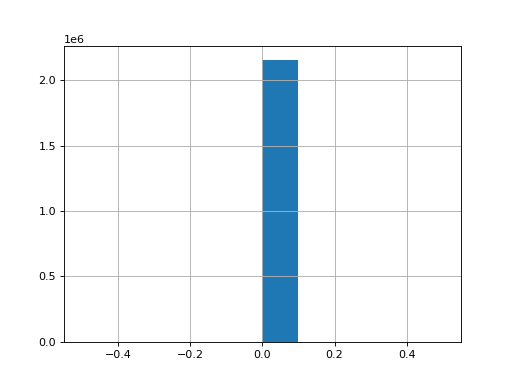

<AxesSubplot:>

In [16]:
plt.figure()
data_f['integ_w_correction'].hist()

In [13]:
e_array_h = []
data_f = data_f[data_f['intg_w']>90]

for i in data_f['cluster'].unique():
    if i != -1:
        evt = data_f[data_f['cluster']==i]
        
        #print(evt['sensor_id'][evt['efine_corrected'].idxmax()])
        maximum_arg = evt['efine_corrected'].idxmax()
        if (((evt['sensor_id'][maximum_arg] == 44) | 
            (evt['sensor_id'][maximum_arg] == 45) | 
            (evt['sensor_id'][maximum_arg] == 54) | 
            (evt['sensor_id'][maximum_arg] == 55)) &
            (evt['n_sipms'][maximum_arg]<64)
            ):
            #print(evt['n_sipms'].unique())
            energy_hamamatsu = np.sum((evt['efine_corrected']+5.0))#-evt['integ_w_correction'])
            
            e_array_h.append(energy_hamamatsu)

        
e_array_h = np.array(e_array_h)
print(e_array_h)

[   11.12573424 -1133.06184467     3.07825377 ... -1117.48765231
    10.16664241    16.1990277 ]


<IPython.core.display.Javascript object>


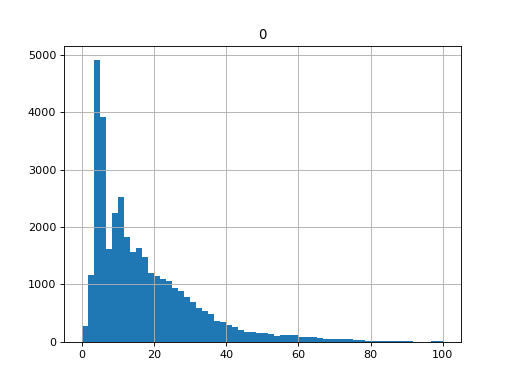

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

In [15]:
#plt.figure()
df_e_array_h = pd.DataFrame(e_array_h)
#axis = fig.add_subplot(111)
#coeff,coeff_err,chisq_r=TPcal.gauss_fit(e_array_h[(e_array_h != 0) & (e_array_h > 0)],200,True,axis,'Gauss Fit','','',[0.65,0.5,"left"],'green')
df_e_array_h[df_e_array_h>0].hist(bins=60,range=(0,100))